In [9]:
# -*- coding: utf-8 -*-
"""
Created on Wed Nov 25 12:32:36 2020

@author: luc
"""

#I -  Apprentissage automatique non profond:Les Forets aleatoires RF

# II.1 - Importation des librairies

import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.preprocessing import MinMaxScaler

In [10]:
# II.2 - Importation des données

data_total = pd.read_csv("https://raw.githubusercontent.com/oreilly-mlsec/book-resources/599669c7124dffb65ea7f6e0b7626df32496b1d6/chapter3/datasets/cpu-utilization/cpu-full-b.csv",parse_dates=[0], index_col=0)


In [16]:
# II.3 - Traitement des données

# II.3.1 - Séparation des données d'apprentissage et de test

train_size=int(len(data_total)*.85)

test_size=len(data_total)-train_size

train,test=data_total.iloc[0:train_size],data_total.iloc[train_size:len(data_total)]

# II.3.2 - Traitement des données et créations de Y (features)

#  Création d'une fonction pour traiter les données

def create_features(df, label=None):
    """
    Creates time series features from datetime index
    """
    df['date'] = df.index
    df['minute'] = df['date'].dt.minute
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['minute','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']]
    if label:
        y = df[label]
        return X, y
    return X

#II.3.3 : Application de la fonction aux données

train_x,y_train= create_features(train,label='cpu')
test_x, y_test = create_features( test, label='cpu')
x_total, y_total = create_features(data_total, label='cpu')

x_total, y_total = create_features(data_total, label='cp')

C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

KeyError: 'cp'

In [17]:
#I.4 : Normalisation des données

def normalisationData(data):
    scaler=MinMaxScaler()
    data=scaler.fit_transform(data)
    return data

scaler=MinMaxScaler()
train_x=scaler.fit_transform(train_x)
test_x=scaler.transform(test_x)
x_total = scaler.transform(x_total)

In [18]:
# I.5 - Application/ Entrainement de l'algorithme RF sur les données


modelRandomF=RandomForestRegressor(n_estimators=300,max_depth=10, random_state=0)
modelRandomF.fit(train_x, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=0)

In [25]:

# I.6 - Prédiction et calcul des erreurs de prevision 

# I.6.1 Fonction de calcul des erreurs de prevision: r2_score et RMSE


def erreurPrediction(Nommodele,data,prediction ):
    print('La precision r2_score du modèle {} est : {}'.format(Nommodele,r2_score(data,prediction)))
    print('La MSE modèle {} est de: {} '.format(Nommodele,mean_squared_error(data,prediction)))
    print('RMSE est:{}'.format(np.sqrt(mean_squared_error(data,prediction))))
 


In [26]:

erreurPrediction("RF sur les données d'apprentissage",y_train,modelRandomF.predict(train_x))
          
erreurPrediction("Random Forest sur les données Test",y_test,modelRandomF.predict(test_x))

print('Le score sur les données RF :{} et RF : {}'.format(modelRandomF.score(train_x,y_train),modelRandomF.score(train_x,y_train)))


La precision r2_score du modèle RF sur les données d'apprentissage est : 0.9913449042369964
La MSE modèle RF sur les données d'apprentissage est de: 0.002088615189220073 
RMSE est:0.04570136966459619
La precision r2_score du modèle Random Forest sur les données Test est : -0.056701361300306674
La MSE modèle Random Forest sur les données Test est de: 0.6058384265163329 
RMSE est:0.7783562336850222
Le score sur les données RF :0.9913449042369964 et RF : 0.9913449042369964


C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


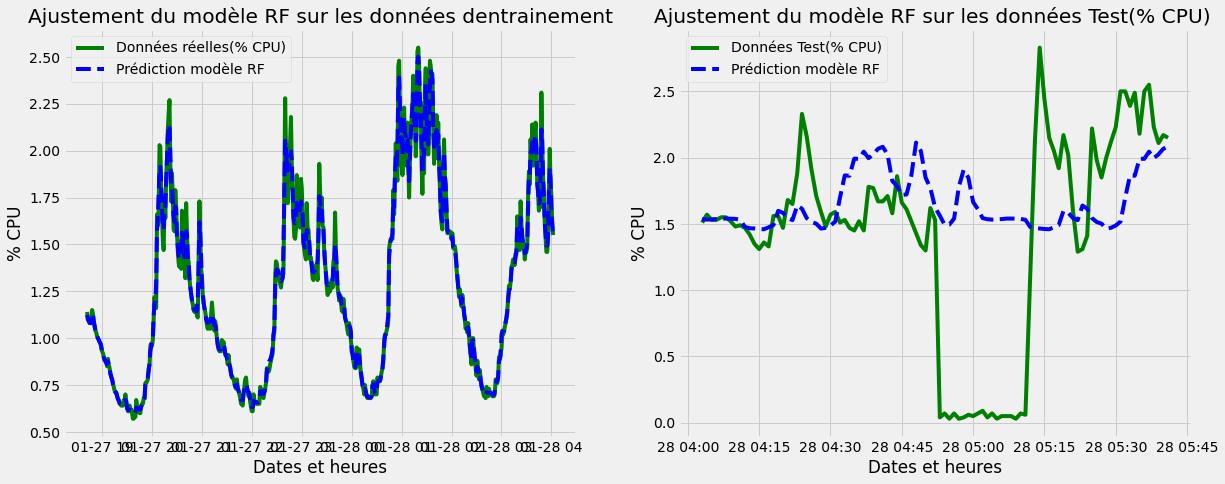

In [27]:
# I.6.2 :  Visualisation des Données


test['Prédiction CPU RF'] = modelRandomF.predict(test_x)

train['Prédiction CPU RF'] =modelRandomF.predict(train_x)

plt.figure(figsize=(18,7))
plt.subplot(1,2,1)
plt.plot(train['date'],train['cpu'],color = 'green', label = 'Données réelles(% CPU)')
plt.plot(train['date'],train['Prédiction CPU RF'],"b--",color = 'blue', label = 'Prédiction modèle RF')
plt.ylabel('% CPU')
plt.xlabel('Dates et heures')
plt.legend(loc = 'best')
plt.title('Ajustement du modèle RF sur les données d''entrainement')
plt.subplot(1,2,2)
plt.plot(test['date'],test['cpu'],color = 'green', label = 'Données Test(% CPU)')
plt.plot(test['date'],test['Prédiction CPU RF'],"b--",color = 'blue', label = 'Prédiction modèle RF')
plt.ylabel('% CPU')
plt.xlabel('Dates et heures')
plt.legend(loc = 'best')
plt.title('Ajustement du modèle RF sur les données Test(% CPU) ')
plt.show()

La precision r2_score du modèle RF simple est : 0.9913449042369964
La MSE modèle RF simple est de: 0.002088615189220073 
RMSE est:0.04570136966459619


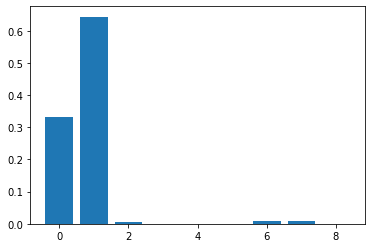

Text(0.5, 0, 'Relative Importance')

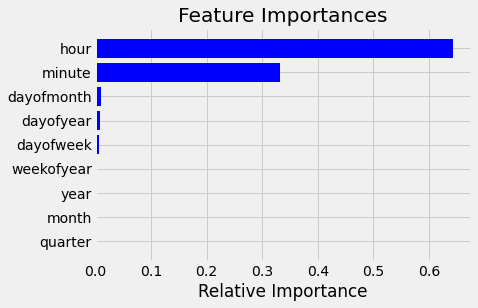

In [22]:
#I.6.3: Importance des variables du modèle RF

modelRandomF.feature_importances_
# plot
plt.bar(range(len(modelRandomF.feature_importances_)), modelRandomF.feature_importances_)
plt.show()

liste_variables=['minute','hour','dayofweek','quarter','month','year',
           'dayofyear','dayofmonth','weekofyear']
   
importances = modelRandomF.feature_importances_
indices = np.argsort(importances)
# style du graphique 
plt.style.use('fivethirtyeight')
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [liste_variables[i] for i in indices])
plt.xlabel('Relative Importance')

C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\luc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


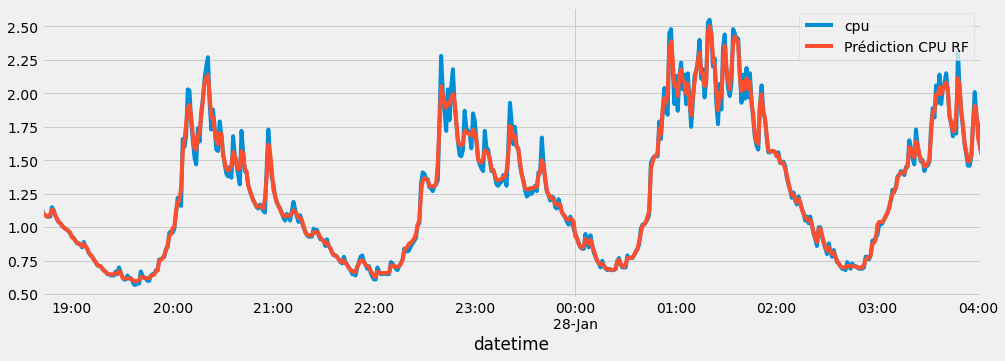

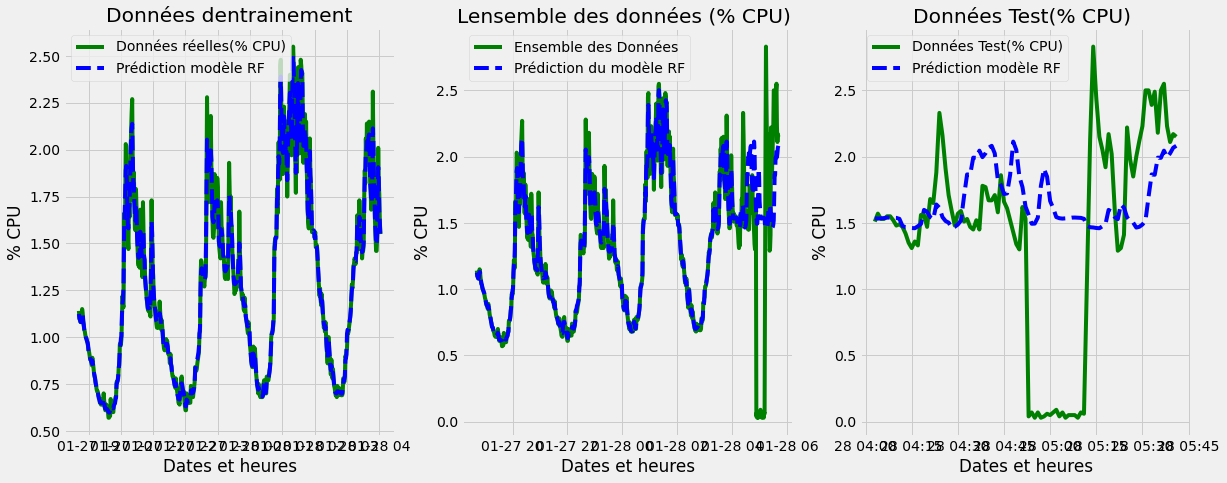

In [29]:
#I.6.4: Visualisation des données 

data_total['Prédiction CPU RF']=modelRandomF.predict(x_total)


train['Prédiction CPU RF'] =modelRandomF.predict(train_x)

test['Prédiction CPU RF']=modelRandomF.predict(test_x)

_ = train[['cpu','Prédiction CPU RF']].plot(figsize=(15, 5))

plt.figure(figsize=(18,7))
plt.subplot(1,3,1)
plt.plot(train['date'],train['cpu'],color = 'green', label = 'Données réelles(% CPU)')
plt.plot(train['date'],train['Prédiction CPU RF'],"b--",color = 'blue', label = 'Prédiction modèle RF')
plt.ylabel('% CPU')
plt.xlabel('Dates et heures')
plt.legend(loc = 'best')
plt.title('Données d''entrainement')
plt.subplot(1,3,2)
plt.plot(data_total['date'],data_total['cpu'],color = 'green', label = 'Ensemble des Données')

plt.plot(data_total['date'],data_total['Prédiction CPU RF'],"b--",color = 'blue', label = 'Prédiction du modèle RF')
plt.ylabel('% CPU')
plt.xlabel('Dates et heures')
plt.legend(loc = 'best')
plt.title('L''ensemble des données (% CPU) ')
plt.subplot(1,3,3)
plt.plot(test['date'],test['cpu'],color = 'green', label = 'Données Test(% CPU)')
plt.plot(test['date'],test['Prédiction CPU RF'],"b--",color = 'blue', label = 'Prédiction modèle RF')
plt.ylabel('% CPU')
plt.xlabel('Dates et heures')
plt.legend(loc = 'best')
plt.title('Données Test(% CPU) ')
plt.show()